In [1]:
import pandas as pd  # For displaying the data after
import matplotlib.pyplot as plt  # for plotting data
from src.twitter_util import TwitterApiGetter
from src.persistance_util import export_container_to_csv
from config import PANDEMICS_WORDS

In [2]:
twg = TwitterApiGetter()
minister_bios = twg.get_all_minister_twitter_bios(
    custom_user_fields=[
        "created_at",
        "description",
        "id",
        "location",
        "name",
        "public_metrics",
        "url",
        "username",
        "verified",
    ],
)
export_container_to_csv(container=minister_bios, path="data/minister_bios.csv")

INFO: 14/14 Twitter accounts of ministers with Twitter handles fetched.


In [3]:
minister_df = pd.read_csv("data/minister_bios.csv")
minister_df.head()

,location,created_at,id,url,description,verified,name,username,followers_count,following_count,tweet_count,listed_count,party
0,"Berlin, Deutschland",2009-05-06T10:08:02.000Z,38150247,https://t.co/pDZ6VOLHnA,Hier twittert das Team Olaf Scholz.,True,Olaf Scholz,OlafScholz,353900,1438,6487,2005,spd
1,"Schillerstraße 11a, 55116 Mainz",2009-02-11T14:34:58.000Z,20593301,https://t.co/QyGCyDDccr,"Bundesminister für Digitales und Verkehr, Vors...",True,Volker Wissing,Wissing,31495,998,13165,624,fdp
2,"Berlin, Deutschland",2010-03-11T16:11:51.000Z,122104353,https://t.co/mJgVJTabCr,Bundesminister der Finanzen. Bundesvorsitzende...,True,Christian Lindner,c_lindner,551246,1371,17693,2415,fdp
3,"Berlin, Deutschland",2015-05-21T14:01:21.000Z,3292982985,https://t.co/aNTUPwOxBp,"SPD Bundestagsabgeordneter, Bundesgesundheitsm...",True,Prof. Karl Lauterbach,Karl_Lauterbach,838295,296,9580,2853,spd
4,NaN,2013-11-07T00:04:11.000Z,2179010672,https://t.co/NnwHzin72J,Dies ist ein Archiv des Twitter-Accounts von A...,True,Annalena Baerbock (Archiv),ABaerbockArchiv,423234,1466,4489,1505,gruene


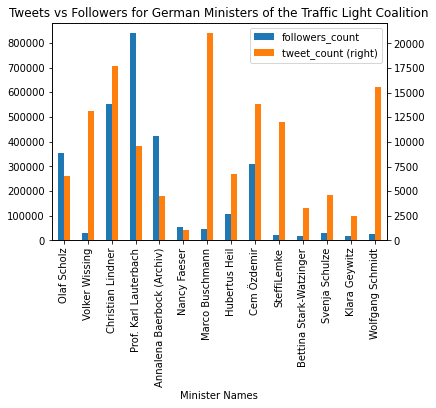

In [4]:
# Some visualization
tweet_ratio_plt = minister_df.plot(
    kind="bar",
    x="name",
    y=["followers_count", "tweet_count"],
    secondary_y="tweet_count",
)
tweet_ratio_plt.set_title(
    "Tweets vs Followers for German Ministers of the Traffic Light Coalition"
)
tweet_ratio_plt.set_xlabel("Minister Names")
plt.show()

In [5]:
party_stats_df = (
    minister_df.groupby(by=["party"])["followers_count", "tweet_count"]
    .mean()
    .sort_values(by=["followers_count", "tweet_count"], ascending=[False, True])
)
party_stats_df

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_65095/2881319713.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  minister_df.groupby(by=["party"])["followers_count", "tweet_count"]


,followers_count,tweet_count
party,,
gruene,252113.333333,10122.666667
spd,204616.000000,6656.000000
fdp,161096.500000,13781.000000


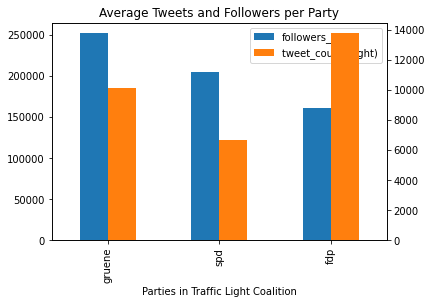

In [6]:
party_stats_plt = party_stats_df.plot(
    kind="bar", y=["followers_count", "tweet_count"], secondary_y="tweet_count"
)
party_stats_plt.set_title("Average Tweets and Followers per Party")
party_stats_plt.set_xlabel("Parties in Traffic Light Coalition")
plt.show()

In [7]:
all_tweets = []

minister_twitter_identifiers = minister_df[["id", "name"]].values.tolist()
for user_id, user_name in minister_twitter_identifiers:
    user_tweets = twg.fetch_user_tweets(user_id=user_id, user_name=user_name)
    all_tweets.extend(user_tweets)

print(f"fetched {len(all_tweets)} tweets in total.")
export_container_to_csv(container=all_tweets, path="data/minister_tweets.csv")

INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 100 tweets.
INFO [user Olaf Scholz ✅]: Fetched 38 tweets.
INFO [user Olaf Scholz ✋]: No next_token in response to furth

In [8]:
tweets_df = pd.read_csv("data/minister_tweets.csv")
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28225 entries, 0 to 28224
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              28225 non-null  int64 
 1   text            28225 non-null  object
 2   created_at      28225 non-null  object
 3   entities        19098 non-null  object
 4   public_metrics  28225 non-null  object
 5   user_id         28225 non-null  int64 
 6   author          28225 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


In [9]:
tweets_df["text"].head(10)

0    RT @RegSprecher: Eine strenge, aber notwendige...
1    RT @wbuechner: #Kanzler @OlafScholz dankte heu...
2    RT @RegSprecher: Wir brechen auf in eine neue ...
3    Abermals heißt es zu Weihnachten: Kontakte red...
4    Mein Dank gilt dem #Expertenrat für die klare ...
5    Die Beschränkungen für Ungeimpfte bleiben – 3G...
6    Wir fordern die kritische Infrastruktur auf, i...
7    Die Impfkampagne wird auch über die Feiertage ...
8    Ich kann alle verstehen, die gerade vor Weihna...
9    Heute hat das Abgeordnetenhaus @FranziskaGiffe...
Name: text, dtype: object

In [10]:
# general info on tweet characterization
tweets_df["is_retweet"] = tweets_df["text"].str.match(r"RT\s@.+")
tweets_df["has_user_mention"] = tweets_df["entities"].isna() == False
tweets_df["text_lower"] = tweets_df["text"].str.lower()

In [11]:
# checking if tweet is about corona
pandemics_search_str = "|".join(PANDEMICS_WORDS)
tweets_df["covid_words_in_tweet"] = tweets_df["text_lower"].str.findall(
    r"{}".format(pandemics_search_str)
)
tweets_df["covid_words_in_tweet_cnt"] = tweets_df["covid_words_in_tweet"].apply(
    lambda word_list: len(word_list)
)

# check if user mentions other users or shares links to further sources
tweets_df["mentions_covid"] = tweets_df["covid_words_in_tweet_cnt"] > 0
links_search_str = "|".join(
    [".*https?://", ".*bitly", ".*goo.gl", ".*tinyurl", ".*ow.ly"]
)
tweets_df["links_in_tweet"] = (
    tweets_df["text_lower"].head(100).str.match(r"{}".format(links_search_str))
)

In [12]:
tweets_df.head(10)

,id,text,created_at,entities,public_metrics,user_id,author,is_retweet,has_user_mention,text_lower,covid_words_in_tweet,covid_words_in_tweet_cnt,mentions_covid,links_in_tweet
0,1479772130862456834,"RT @RegSprecher: Eine strenge, aber notwendige...",2022-01-08T11:09:03.000Z,"{'mentions': [{'start': 3, 'end': 15, 'usernam...","{'retweet_count': 51, 'reply_count': 0, 'like_...",38150247,Olaf Scholz,True,True,"rt @regsprecher: eine strenge, aber notwendige...",[],0,False,False
1,1478809222435463178,RT @wbuechner: #Kanzler @OlafScholz dankte heu...,2022-01-05T19:22:48.000Z,"{'mentions': [{'start': 3, 'end': 13, 'usernam...","{'retweet_count': 38, 'reply_count': 0, 'like_...",38150247,Olaf Scholz,True,True,rt @wbuechner: #kanzler @olafscholz dankte heu...,[],0,False,False
2,1476965982350585860,RT @RegSprecher: Wir brechen auf in eine neue ...,2021-12-31T17:18:25.000Z,"{'mentions': [{'start': 3, 'end': 15, 'usernam...","{'retweet_count': 366, 'reply_count': 0, 'like...",38150247,Olaf Scholz,True,True,rt @regsprecher: wir brechen auf in eine neue ...,[],0,False,False
3,1474344664207609859,Abermals heißt es zu Weihnachten: Kontakte red...,2021-12-24T11:42:14.000Z,NaN,"{'retweet_count': 295, 'reply_count': 2430, 'l...",38150247,Olaf Scholz,False,False,abermals heißt es zu weihnachten: kontakte red...,[],0,False,False
4,1473369051313455106,Mein Dank gilt dem #Expertenrat für die klare ...,2021-12-21T19:05:30.000Z,NaN,"{'retweet_count': 52, 'reply_count': 377, 'lik...",38150247,Olaf Scholz,False,False,mein dank gilt dem #expertenrat für die klare ...,[],0,False,False
5,1473369049966985222,Die Beschränkungen für Ungeimpfte bleiben – 3G...,2021-12-21T19:05:30.000Z,NaN,"{'retweet_count': 50, 'reply_count': 241, 'lik...",38150247,Olaf Scholz,False,False,die beschränkungen für ungeimpfte bleiben – 3g...,[],0,False,False
6,1473369048498987009,"Wir fordern die kritische Infrastruktur auf, i...",2021-12-21T19:05:29.000Z,NaN,"{'retweet_count': 37, 'reply_count': 114, 'lik...",38150247,Olaf Scholz,False,False,"wir fordern die kritische infrastruktur auf, i...",[pandemie],1,True,False
7,1473369047060385800,Die Impfkampagne wird auch über die Feiertage ...,2021-12-21T19:05:29.000Z,NaN,"{'retweet_count': 32, 'reply_count': 83, 'like...",38150247,Olaf Scholz,False,False,die impfkampagne wird auch über die feiertage ...,[impfung],1,True,False
8,1473369044996796434,"Ich kann alle verstehen, die gerade vor Weihna...",2021-12-21T19:05:28.000Z,NaN,"{'retweet_count': 246, 'reply_count': 1785, 'l...",38150247,Olaf Scholz,False,False,"ich kann alle verstehen, die gerade vor weihna...",[virus],1,True,False
9,1473272074315747335,Heute hat das Abgeordnetenhaus @FranziskaGiffe...,2021-12-21T12:40:09.000Z,"{'mentions': [{'start': 31, 'end': 47, 'userna...","{'retweet_count': 74, 'reply_count': 548, 'lik...",38150247,Olaf Scholz,False,True,heute hat das abgeordnetenhaus @franziskagiffe...,[],0,False,False


In [13]:
covid_mentions_df = (
    tweets_df.groupby("author")["mentions_covid"].sum().rename("tweets_with_covid_cnt")
)
covid_mentions_df["tweets_without_covid_cnt"] = tweets_df.groupby("author")[
    "mentions_covid"
].count()
covid_mentions_df

author
Annalena Baerbock (Archiv)                                                  163
Bettina Stark-Watzinger                                                     275
Cem Özdemir                                                                 267
Christian Lindner                                                           467
Hubertus Heil                                                               160
Klara Geywitz                                                                10
Marco Buschmann                                                             386
Nancy Faeser                                                                 89
Olaf Scholz                                                                 258
Prof. Karl Lauterbach                                                      1569
SteffiLemke                                                                  67
Svenja Schulze                                                               83
Volker Wissing                   

In [14]:
tweets_stats_per_author_df = (
    tweets_df[["author", "mentions_covid"]].groupby("author").mean()
)
tweets_stats_per_author_df = tweets_stats_per_author_df["mentions_covid"].rename(
    "covid_tweets_share"
)
tweets_stats_per_author_df = tweets_stats_per_author_df.sort_values(ascending=True)

/var/folders/n6/gc1kg4891tzd041w9shtbb_c0000gn/T/ipykernel_65095/2089155856.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  covid_stats_plt.set_xticklabels(


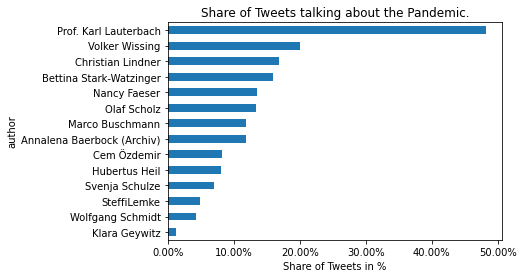

In [15]:
covid_stats_plt = tweets_stats_per_author_df.plot.barh(
    y="covid_tweets_share", title="Share of Tweets talking about the Pandemic."
)
covid_stats_plt.set_xlabel("Share of Tweets in %")
covid_stats_plt.set_xticklabels(
    ["{:,.2%}".format(x) for x in covid_stats_plt.get_xticks()]
)
plt.show()

In [33]:
# now lemmatization of words to make this even better
tweets_df["author"].unique()

array(['Olaf Scholz', 'Volker Wissing', 'Christian Lindner',
       'Prof. Karl Lauterbach', 'Annalena Baerbock (Archiv)',
       'Nancy Faeser', 'Marco Buschmann', 'Hubertus Heil', 'Cem Özdemir',
       'SteffiLemke', 'Bettina Stark-Watzinger', 'Svenja Schulze',
       'Klara Geywitz', 'Wolfgang Schmidt'], dtype=object)

In [17]:
for word in [
    "impfpflicht",
    "pflege",
    "lockdown",
    "weihnachtslockdown",
    "nebenwirkung*",
    "notstand",
    "maskenpflicht",
]:
    found_in_tweets_cnt = tweets_df[tweets_df["text_lower"].str.match(f".*{word}")][
        "id"
    ].count()
    print(f"Found {word!r} in {found_in_tweets_cnt} tweets.")

Found 'impfpflicht' in 90 tweets.
Found 'pflege' in 212 tweets.
Found 'lockdown' in 450 tweets.
Found 'weihnachtslockdown' in 0 tweets.
Found 'nebenwirkung*' in 38 tweets.
Found 'notstand' in 13 tweets.
Found 'maskenpflicht' in 52 tweets.


In [34]:
tweets_df[
    (tweets_df.author == "Prof. Karl Lauterbach") & (tweets_df.mentions_covid == True)
]

,id,text,created_at,entities,public_metrics,user_id,author,is_retweet,has_user_mention,text_lower,covid_words_in_tweet,covid_words_in_tweet_cnt,mentions_covid,links_in_tweet
6189,1479982154390065158,Unglaublich. Der wahrscheinlich intelligentest...,2022-01-09T01:03:37.000Z,"{'mentions': [{'start': 66, 'end': 76, 'userna...","{'retweet_count': 141, 'reply_count': 936, 'li...",3292982985,Prof. Karl Lauterbach,False,True,unglaublich. der wahrscheinlich intelligentest...,[impfung],1,True,NaN
6190,1479933834183467014,Die Daten aus UK zeigen bei Kindern erschrecke...,2022-01-08T21:51:36.000Z,NaN,"{'retweet_count': 1187, 'reply_count': 2062, '...",3292982985,Prof. Karl Lauterbach,False,False,die daten aus uk zeigen bei kindern erschrecke...,"[maske, maske]",2,True,NaN
6192,1479771247496028163,Der CDC Report zeigt bei Kindern und Jugendlic...,2022-01-08T11:05:32.000Z,NaN,"{'retweet_count': 583, 'reply_count': 925, 'li...",3292982985,Prof. Karl Lauterbach,False,False,der cdc report zeigt bei kindern und jugendlic...,"[covid, impfung]",2,True,NaN
6193,1479626311685619716,"Diejenigen, die noch ungeimpft sind, sollten w...",2022-01-08T01:29:37.000Z,NaN,"{'retweet_count': 200, 'reply_count': 566, 'li...",3292982985,Prof. Karl Lauterbach,False,False,"diejenigen, die noch ungeimpft sind, sollten w...",[impfung],1,True,NaN
6194,1479626309995319299,Die neuen UK Daten zeigen eine überragende Wir...,2022-01-08T01:29:37.000Z,NaN,"{'retweet_count': 790, 'reply_count': 1058, 'l...",3292982985,Prof. Karl Lauterbach,False,False,die neuen uk daten zeigen eine überragende wir...,[impfung],1,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9426,1318690471988940802,With a coach working for the virus there is no...,2020-10-20T23:08:03.000Z,NaN,"{'retweet_count': 71, 'reply_count': 29, 'like...",3292982985,Prof. Karl Lauterbach,False,False,with a coach working for the virus there is no...,"[rki, virus]",2,True,NaN
9427,1318688251054641152,(2) In der mittleren Altersgruppe werden viele...,2020-10-20T22:59:13.000Z,NaN,"{'retweet_count': 186, 'reply_count': 50, 'lik...",3292982985,Prof. Karl Lauterbach,False,False,(2) in der mittleren altersgruppe werden viele...,[covid],1,True,NaN
9429,1318685325913477126,(2) Das ist klar weiteres Argument zu Vorsicht...,2020-10-20T22:47:36.000Z,NaN,"{'retweet_count': 25, 'reply_count': 11, 'like...",3292982985,Prof. Karl Lauterbach,False,False,(2) das ist klar weiteres argument zu vorsicht...,[impfung],1,True,NaN
9430,1318684070281465856,"(1) Keine unwichtige Studie. Pat., die entwede...",2020-10-20T22:42:36.000Z,NaN,"{'retweet_count': 73, 'reply_count': 18, 'like...",3292982985,Prof. Karl Lauterbach,False,False,"(1) keine unwichtige studie. pat., die entwede...",[impfung],1,True,NaN
